#### HMA glacier elevatin change analysis by using data by Huggonet et al.(2021) .
!!Note: the glacier outline data used by Huggonet et al.(2021) is RGI6.0


In [1]:
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
from utils.scatter_plot import scatter_plot


In [2]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_dhdt_rgi60_13 = 'data/glaciers/gla-elev-change-hugonnet/pergla_time_series/dh_13_rgi60_pergla_rates.csv'
path_dhdt_rgi60_14 = 'data/glaciers/gla-elev-change-hugonnet/pergla_time_series/dh_14_rgi60_pergla_rates.csv'
path_dhdt_rgi60_15 = 'data/glaciers/gla-elev-change-hugonnet/pergla_time_series/dh_15_rgi60_pergla_rates.csv'
path_rgi60_13_gla = 'data/glaciers/rgi60(deprecated)/rgi60_13.gpkg'
path_rgi60_14_gla = 'data/glaciers/rgi60(deprecated)/rgi60_14.gpkg'
path_rgi60_15_gla = 'data/glaciers/rgi60(deprecated)/rgi60_15.gpkg'


In [3]:
### read in data   
hma_gtng = gpd.read_file(path_hma_gtng)
hma_gtng = gpd.read_file(path_hma_gtng).to_crs(ccrs.PlateCarree().proj4_init)
rgi60_13_gla = gpd.read_file(path_rgi60_13_gla)
rgi60_14_gla = gpd.read_file(path_rgi60_14_gla)
rgi60_15_gla = gpd.read_file(path_rgi60_15_gla)
dhdt_rgi60_13 = pd.read_csv(path_dhdt_rgi60_13)
dhdt_rgi60_14 = pd.read_csv(path_dhdt_rgi60_14)
dhdt_rgi60_15 = pd.read_csv(path_dhdt_rgi60_15)
# hma_gtng.head()
dhdt_rgi60_13.head()


,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda
0,RGI60-13.00001,2000-01-01_2001-01-01,432000,0.1924,3.4158,83118.0,1475680.0,0.000071,0.001254,0.1635,2.9036
1,RGI60-13.00001,2000-01-01_2002-01-01,432000,0.2226,1.6643,96143.0,719059.0,0.000082,0.000611,0.1892,1.4151
2,RGI60-13.00001,2000-01-01_2004-01-01,432000,0.2067,0.8416,89301.0,363718.0,0.000076,0.000309,0.1757,0.7161
3,RGI60-13.00001,2000-01-01_2005-01-01,432000,0.1841,0.6705,79542.0,289813.0,0.000068,0.000246,0.1565,0.5707
4,RGI60-13.00001,2000-01-01_2010-01-01,432000,0.0928,0.3335,40091.0,144161.0,0.000034,0.000123,0.0789,0.2839


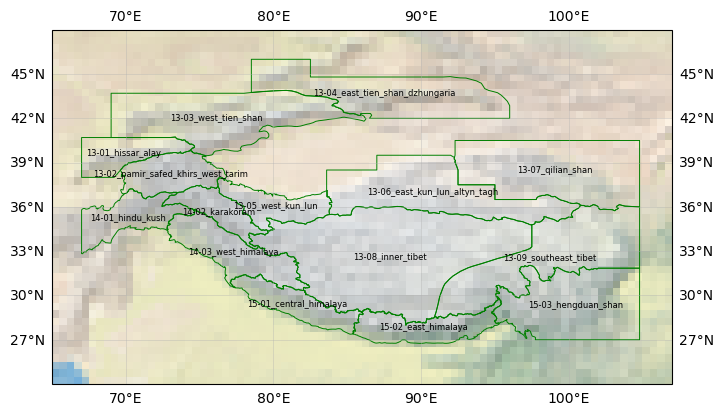

In [4]:
geo_centers = hma_gtng.geometry.centroid
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
for x, y, label in zip(geo_centers.x, geo_centers.y, hma_gtng['long_code']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center', transform=ccrs.PlateCarree())


In [11]:
### Select period of 2000-2019, and glacier with area larger than 2 km2
area_thre = 1_000_000
dhdt_rgi60_13_sel = dhdt_rgi60_13[(dhdt_rgi60_13['period']=='2000-01-01_2020-01-01') & 
                            (dhdt_rgi60_13['area'] >= area_thre)]  
dhdt_rgi60_14_sel = dhdt_rgi60_14[(dhdt_rgi60_14['period']=='2000-01-01_2020-01-01') & 
                            (dhdt_rgi60_14['area'] >= area_thre)]  
dhdt_rgi60_15_sel = dhdt_rgi60_15[(dhdt_rgi60_15['period']=='2000-01-01_2020-01-01') & 
                            (dhdt_rgi60_15['area'] >= area_thre)]  
print(dhdt_rgi60_13.shape)  
print(dhdt_rgi60_13_sel.shape)  
dhdt_rgi60_13_sel.head(2)


(1048575, 11)
(3662, 11)


,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda
677,RGI60-13.00017,2000-01-01_2020-01-01,1319000,0.1546,0.1834,203888.0,242537.0,0.000173,0.000207,0.1314,0.1570
1055,RGI60-13.00026,2000-01-01_2020-01-01,1755000,0.1529,0.1807,268411.0,318979.0,0.000228,0.000272,0.1300,0.1556


In [12]:
### merge the selected glacier sin rgi60_13, rgi60_14, rgi60_15 region. 
dhdt_gla_sel = pd.concat([dhdt_rgi60_13_sel, dhdt_rgi60_14_sel, dhdt_rgi60_15_sel], ignore_index=True)
print(dhdt_gla_sel.shape)
dhdt_gla_sel.head(2)


(10689, 11)


,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda
0,RGI60-13.00017,2000-01-01_2020-01-01,1319000,0.1546,0.1834,203888.0,242537.0,0.000173,0.000207,0.1314,0.1570
1,RGI60-13.00026,2000-01-01_2020-01-01,1755000,0.1529,0.1807,268411.0,318979.0,0.000228,0.000272,0.1300,0.1556


In [13]:
### merge glaciers in rgi60_13, rgi60_14, rgi60_15 region, and obtain the glacier geometry from rgi60 data.
rgi60_gla = pd.concat([rgi60_13_gla, rgi60_14_gla, rgi60_15_gla], ignore_index=True)
dhdt_gla_sel_gpd = pd.merge(dhdt_gla_sel, rgi60_gla[['RGIId', 'geometry']], \
                                  left_on='rgiid', right_on='RGIId', how='left')
dhdt_gla_sel_gpd = dhdt_gla_sel_gpd.drop(columns=['RGIId']) 
dhdt_gla_sel_gpd = gpd.GeoDataFrame(dhdt_gla_sel_gpd, geometry='geometry') ## convert to geodataframe
dhdt_gla_sel_gpd = dhdt_gla_sel_gpd.to_crs(ccrs.PlateCarree().proj4_init)
dhdt_gla_sel_gpd.head()


,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda,geometry
0,RGI60-13.00017,2000-01-01_2020-01-01,1319000,0.1546,0.1834,203888.0,242537.0,0.000173,0.000207,0.1314,0.1570,"MULTIPOLYGON (((78.357 35.560, 78.357 35.560, ..."
1,RGI60-13.00026,2000-01-01_2020-01-01,1755000,0.1529,0.1807,268411.0,318979.0,0.000228,0.000272,0.1300,0.1556,"MULTIPOLYGON (((78.372 35.552, 78.372 35.552, ..."
2,RGI60-13.00046,2000-01-01_2020-01-01,1305000,0.0130,0.1821,16925.0,237638.0,0.000014,0.000202,0.0110,0.1548,"MULTIPOLYGON (((78.272 35.664, 78.272 35.665, ..."
3,RGI60-13.00052,2000-01-01_2020-01-01,1437000,0.1413,0.1849,203107.0,266141.0,0.000173,0.000227,0.1201,0.1579,"MULTIPOLYGON (((78.104 35.647, 78.103 35.646, ..."
4,RGI60-13.00062,2000-01-01_2020-01-01,2222000,0.0585,0.1726,129921.0,383621.0,0.000110,0.000326,0.0497,0.1468,"MULTIPOLYGON (((78.120 35.644, 78.120 35.644, ..."


Text(0.5, 1.0, 'Histogram of glaicer area for 2000-2019')

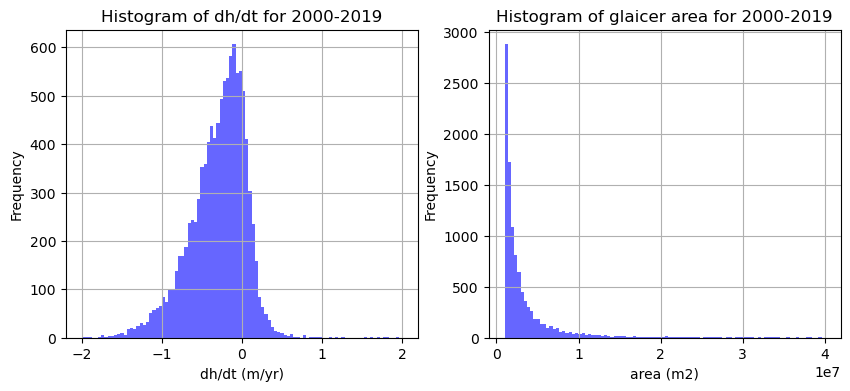

In [16]:
### plot histogram of glaciers dh/dt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
dhdt_gla_sel_gpd['dhdt'].hist(bins=100, edgecolor='none', \
                            range=[-2, 2], facecolor='blue', alpha=0.6, ax=ax[0])
dhdt_gla_sel_gpd['area'].hist(bins=100, edgecolor='none', \
                            range=[1*1e6, 40*1e6], facecolor='blue', alpha=0.6, ax=ax[1]) 
ax[0].set_ylabel('Frequency'); ax[0].set_xlabel('dh/dt (m/yr)')
ax[0].set_title('Histogram of dh/dt for 2000-2019')
ax[1].set_ylabel('Frequency'); ax[1].set_xlabel('area (m2)')
ax[1].set_title('Histogram of glaicer area for 2000-2019')


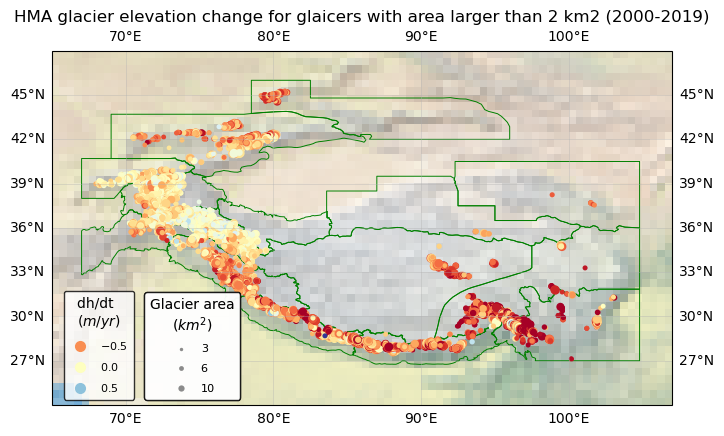

In [ ]:
gla_area_clip = dhdt_gla_sel_gpd['area'].values/1_000_000
gla_area_clip[gla_area_clip>10] = 10  
gla_sel_centers = dhdt_gla_sel_gpd.geometry.representative_point()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
ax = scatter_plot(x=gla_sel_centers.x, y=gla_sel_centers.y, 
                          size=gla_area_clip,  
                          color=dhdt_gla_sel_gpd['dhdt'].values, 
                          ax=ax, 
                          labels_size = [3, 6, 10], 
                          labels_color = [-0.5, 0, 0.5], 
                          scale_size = 2
                          )
ax.set_title('HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')
## save to gpkg file.
# dhdt_gla_sel_gpd.to_file("data/glaciers/gla-elev-change-hugonnet/pergla_time_series/hma_gla_larger1.gpkg", driver='GPKG')

